In [17]:
# Problem 1:
import numpy as np
from numpy import linspace
from pyit2fls import IT2FLS, IT2FS_Gaussian_UncertStd, IT2FS_plot, \
                     min_t_norm, max_s_norm, TR_plot, crisp

In [18]:
# Define the two-dimensional sinc function:
def sinc2d(x1, x2):
    for x, x1 in enumerate(np.linspace(-10, 10, 50)):
     for y, x2 in enumerate(np.linspace(-10, 10, 50)):
         sinc2d[x,y] = np.sin(x1) * np.sin(x2) / (x1*x2)
         return y 
domain = linspace(-10, 10, 50)

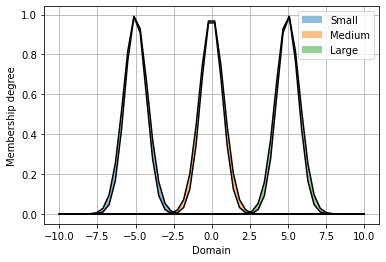

In [19]:
# The mean, the standard deviation center, the standard deviation spread, 
# and the height for the sets:
Small = IT2FS_Gaussian_UncertStd(domain, [-5, 0.75, 0.1, 1.])
Medium = IT2FS_Gaussian_UncertStd(domain, [0, 0.75, 0.1, 1.])
Large = IT2FS_Gaussian_UncertStd(domain, [5, 0.75, 0.1, 1.])
IT2FS_plot(Small, Medium, Large, legends=["Small", "Medium", "Large"])

In [20]:
# Create system where there are two inputs and one output:
myIT2FLS = IT2FLS()
myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")
myIT2FLS.add_output_variable("y")

In [21]:
# Fuzzy IF-THEN rules:
myIT2FLS.add_rule([("x1", Small), ("x2", Small)], [("y", Small)])
myIT2FLS.add_rule([("x1", Medium), ("x2", Medium)], [("y", Large)])
myIT2FLS.add_rule([("x1", Large), ("x2", Large)], [("y", Small)])

In [22]:
# Evaluate using minimum t-norm and maximum s-norm. The centroid method is 
# used to evalute the IF-THEN rules and the KM algorithm is used for type reduction
# algorithm. The inputs evaluted are 0.5 and 0.1.
it2out, tr = myIT2FLS.evaluate({"x1":0.5, "x2":0.1}, min_t_norm, max_s_norm, domain, 
                               method= "Centroid", algorithm= "KM")

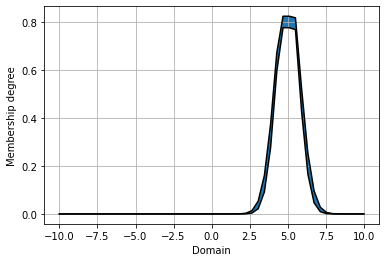

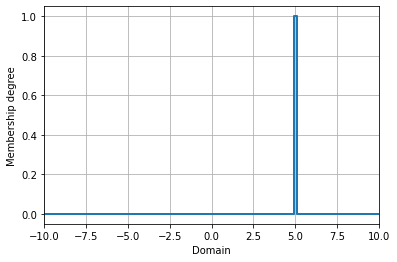

5.003851213856443


In [23]:
# Here the output IT2FSs and their type reduced versions are plotted.
# The crisp output is also calculated and printed.
it2out["y"].plot()
TR_plot(domain, tr["y"])
print(crisp(tr["y"]))

In [24]:
# Problem 2

# Doesn't work because I'm using Python 3 and not Python 2:
# import anfis
# import membership.membershipfunction

In [14]:
# Updating the model with Membership Functions
mfc = membershipfunction.MemFuncs(mf)

# Creating the ANFIS Model Object
anf = anfis.ANFIS(x, y, mfc)
# Fitting the ANFIS Model
anf.trainHybridJangOffLine(epochs=10)
anf.plotMF(mf, X)

NameError: name 'membershipfunction' is not defined

In [25]:
# Resources:
# Haghrah, A.A. (2021, Aug 4). PyIT2FLS. Github. 
# https://github.com/Haghrah/PyIT2FLS/blob/master/examples/ex_3.py

# Hektor, E. (2020, May 9). Why error “only integer scalar arrays can be converted to a scalar index” occurs?. 
# Stack Overflow. https://stackoverflow.com/questions/61696642/why-error-only-integer-scalar-arrays-can-be-converted-to-a-scalar-index-occurs 